In [4]:
import numpy as np

import requests, io

fname='https://github.com/celstark/n247data/raw/main/data/Filter2_data.npz'
# This would also work
#fname='https://raw.githubusercontent.com/celstark/n247data/main/data/Filter1_data.npz'
response = requests.get(fname)
response.raise_for_status()
d=np.load(io.BytesIO(response.content))

data = d['data']
times1 = d['times1']
times2 = d['times2']

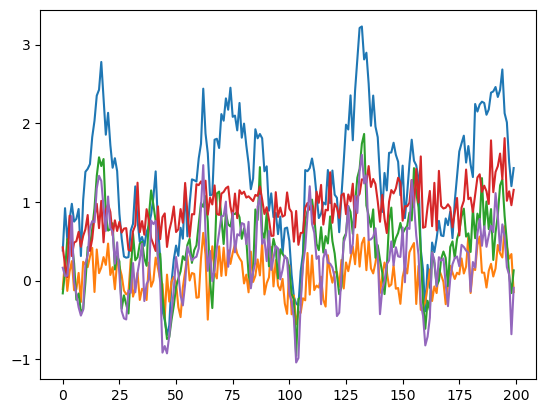

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

nobs=100
ntr=200

c0=np.arange(ntr)+1
c1=np.log10(c0)
c2=np.sin(c0/9.5)
pre_c3=np.zeros(ntr)
pre_c3[17::23]=1
pre_c3[8::19]=-1
c3=signal.convolve(pre_c3,signal.windows.hann(9),mode='same')

#plt.plot(c1)
#plt.plot(c2)
#plt.plot(c3)

rng=np.random.default_rng()
#b0s=rng.uniform(-1,1,nobs)
b1s=rng.uniform(0,1,nobs)
b2s=rng.uniform(0,1,nobs)
b3s=rng.uniform(0,1,nobs)
data=np.zeros((nobs,ntr))

for i in range(nobs):
    data[i,:] = b1s[i]*c1 + b2s[i]*c2 + b3s[i]*c3 + 0.2*rng.normal(size=ntr)

plt.figure()
plt.plot(data[0:5,:].T)

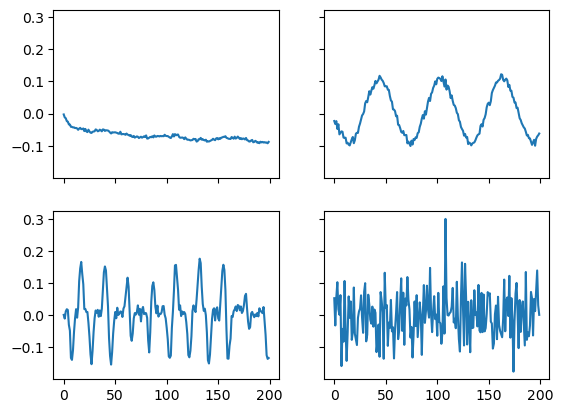

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
X_r = pca.fit(data).transform(data)
evs=pca.components_

from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
axs[0,0].plot(evs[0,:])
axs[0,1].plot(evs[1,:])
axs[1,0].plot(evs[2,:])
axs[1,1].plot(evs[3,:])



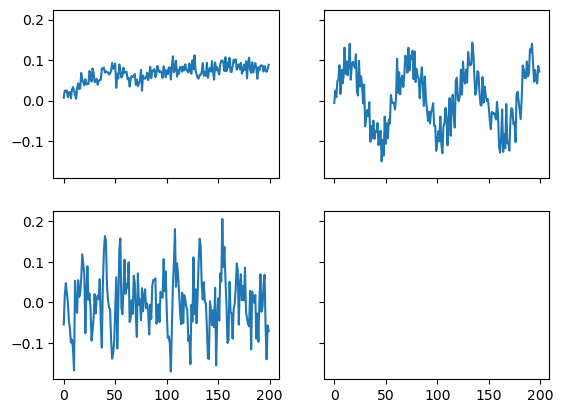

explained variance ratio (first two components): [0.92461872 0.05306648]


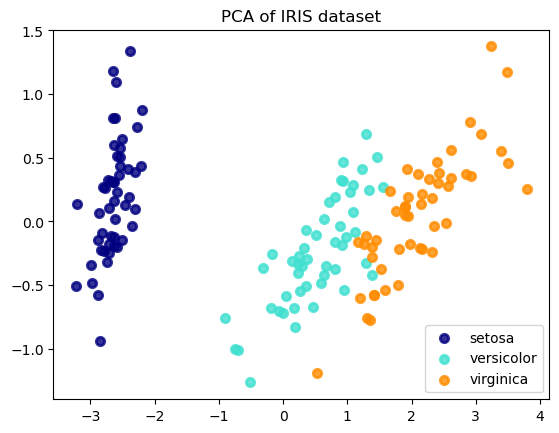

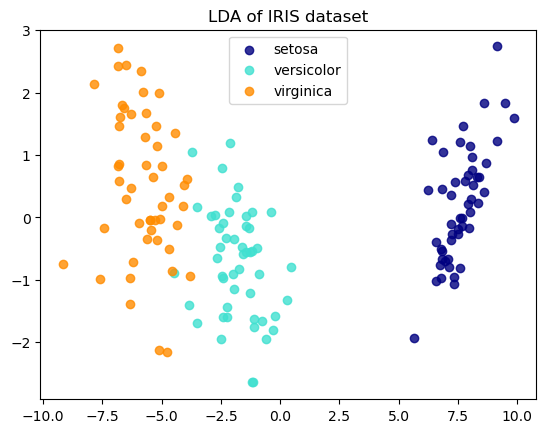

In [5]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()